# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Loading the Dataset

In [2]:
dataset = pd.read_excel("Sample - Superstore.xls")
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
dataset.shape

(9994, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Check for Missing Values

In [6]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Features that does not contribute to the analysis
Row ID: It is likely an index for the rows in the data and will not provide any meaningful information for analysis.

Order ID: This is generally a unique identifier for each order, which would not contribute much to an analysis, unless you're interested in the frequency of orders (multiple lines per order, for instance).

Customer ID: Just like Order ID, this is probably a unique identifier for each customer. While it's useful for joining tables or identifying repeat customers, it might not be directly useful for general data analysis. However, it could be important if you're looking at individual customer behavior.

Customer Name: Typically, a customer's name does not contribute to sales analysis unless it is to differentiate between different customers. But that is also done by Customer ID.

Product ID: Like the other ID fields, this likely uniquely identifies each product, and isn't as useful for general analysis unless we are interested in the performance or characteristics of individual products.

Ship Date: Depending on the analysis, this may not be necessary if we already have the Order Date. It might be relevant if we're looking into delivery efficiency or time from order to shipment, but if the focus is solely on the sales or profits, this might not be needed.

Postal Code: While this could be relevant for geographical analysis, if we already have information like City, State, and Region, the Postal Code may be redundant unless we're examining data at a very granular level.

Sinceb the outcome variable is Profit, the necessary features would be those that could directly or indirectly affect the profit.

Sales: This is directly related to the profit as higher sales would generally lead to higher profit, assuming costs remain stable.

Quantity: The number of products sold could influence the profit.

Discount: Discounts could reduce the profit margin on each item sold, so this would also be an important feature.

Category and Sub-Category: Different types of products might have different profit margins.

Segment: Different customer segments might have different purchasing behaviors, which could impact the profit.

Country, City, State, Region: These could impact profit due to different demands, competition, costs, or regulations in different geographical areas.

Ship Mode: Different shipping modes could have different costs, thereby affecting profit.

Product Name or Product ID: Some specific products might be more profitable than others.

Order Date: This could be relevant for analyzing trends over time, including seasonal trends.

# Dropping Features not useful for the analysis


In [7]:
# Define a list of columns to drop
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Ship Date', 'Postal Code','Product Name']

# Drop the columns
dataset = dataset.drop(columns_to_drop, axis=1)
dataset.head()

,Order Date,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,Second Class,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Extract the year, month,  day and the day of the week from Order Date

In [8]:
# Extract features from the date and create new DataFrames
year = dataset['Order Date'].dt.year
month = dataset['Order Date'].dt.month
day = dataset['Order Date'].dt.day
day_of_week = dataset['Order Date'].dt.dayofweek  # Monday=0, Sunday=6

# Concatenate the new columns at the beginning of the original DataFrame
dataset = pd.concat([year, month, day, day_of_week, dataset], axis=1)

# Rename the new columns
dataset.columns.values[0] = "Year"
dataset.columns.values[1] = "Month"
dataset.columns.values[2] = "Day"
dataset.columns.values[3] = "DayOfWeek"

# Drop the Order Date
dataset = dataset.drop(['Order Date'], axis=1)
dataset.head()

,Year,Month,Day,DayOfWeek,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016,11,8,1,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016,11,8,1,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016,6,12,6,Second Class,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015,10,11,6,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015,10,11,6,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Check the Frequecies of Categorical features
This can help to determine what type of method that will be used to convert categorical features to numerics features

In [9]:
# Frequency Analysis
for column in dataset.select_dtypes(include='object'):
    freq_counts = dataset[column].value_counts()
    print(f"Frequency analysis for {column}:")
    print(freq_counts)
    print()


Frequency analysis for Ship Mode:
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Frequency analysis for Segment:
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Frequency analysis for Country:
United States    9994
Name: Country, dtype: int64

Frequency analysis for City:
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

Frequency analysis for State:
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           24

# Numerical Features Relationship

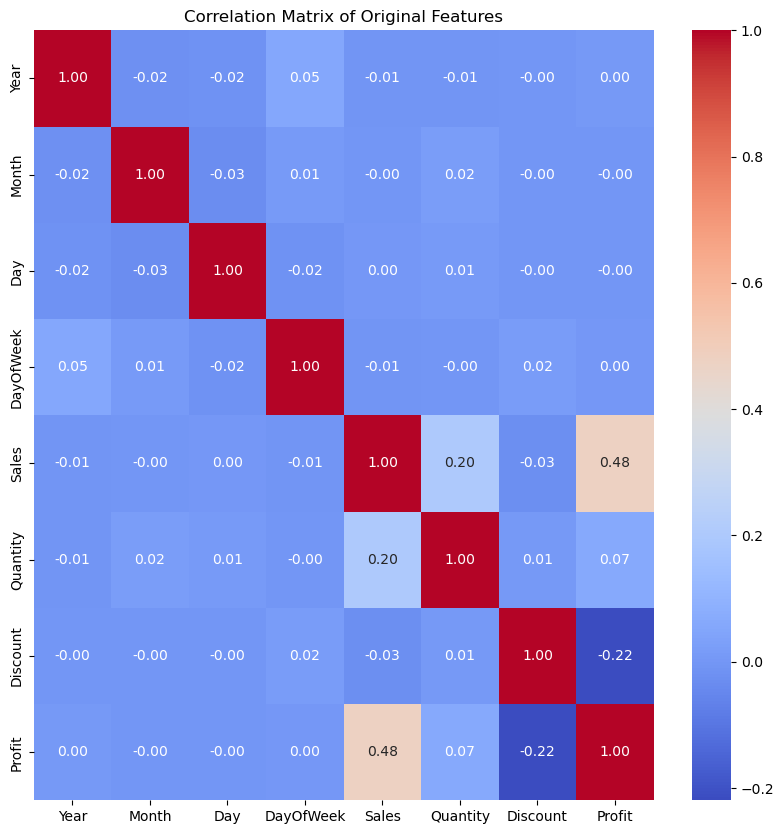

In [10]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Original Features')
plt.show()

# Categorical Features Relationship

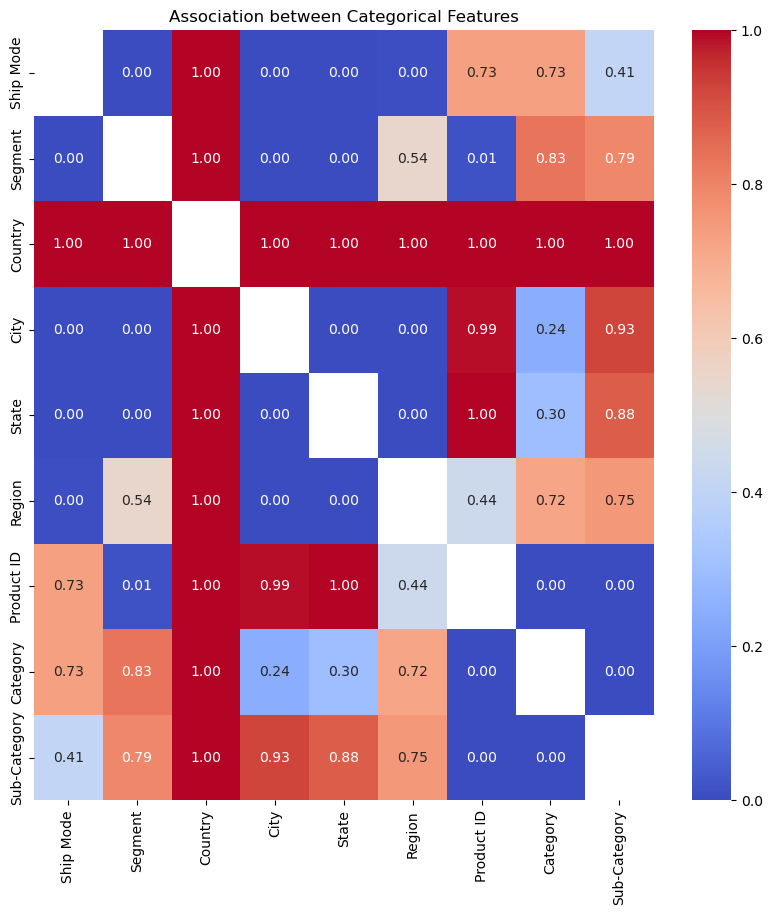

In [11]:
# Select categorical features
categorical_features = dataset.select_dtypes(include='object').columns

# Calculate the chi-square test p-values for pairs of categorical variables
p_values = pd.DataFrame(index=categorical_features, columns=categorical_features)
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            contingency_table = pd.crosstab(dataset[feature1], dataset[feature2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            p_values.loc[feature1, feature2] = p_value

# Visualize the association between categorical features using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(p_values.astype(float), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Association between Categorical Features')
plt.show()

# Plot an histogram of each Numeric features
Plotting an histogram can help to check the distribution of the dataset. This distribtuion can help to provide insight on presence of outliers in the dataset

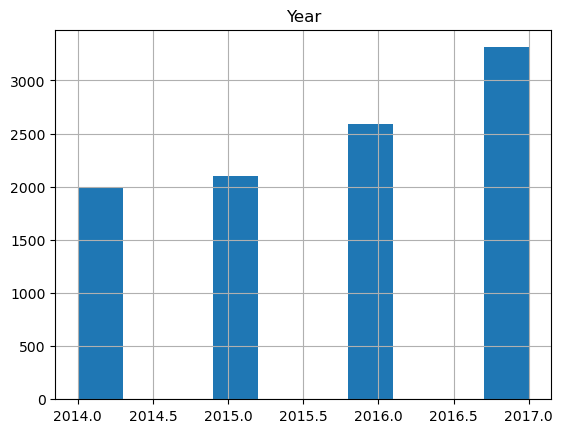

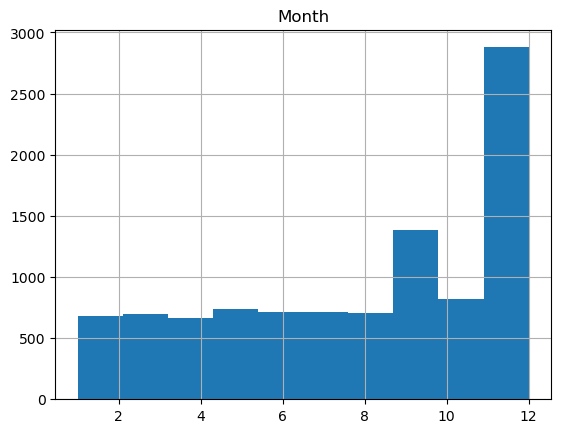

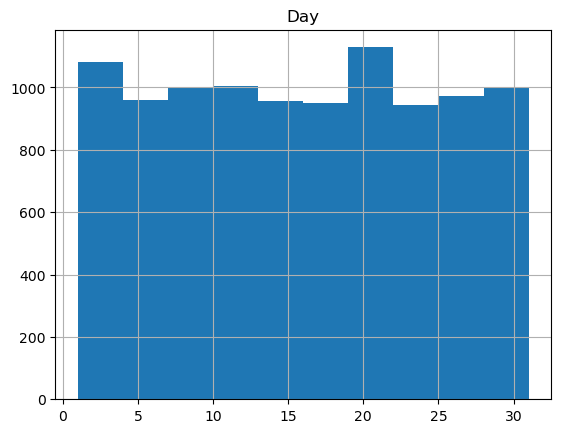

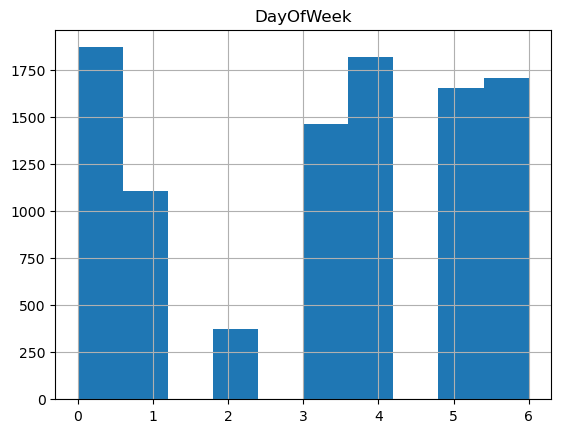

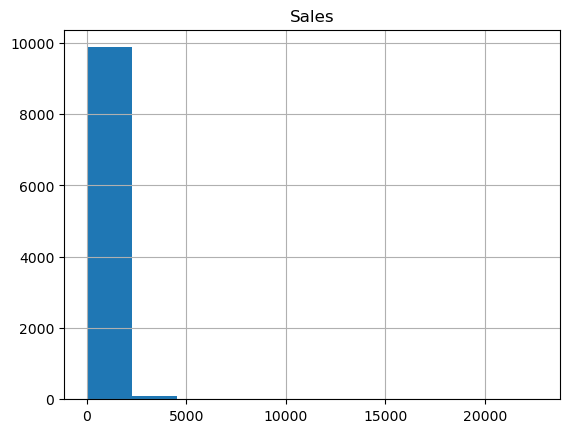

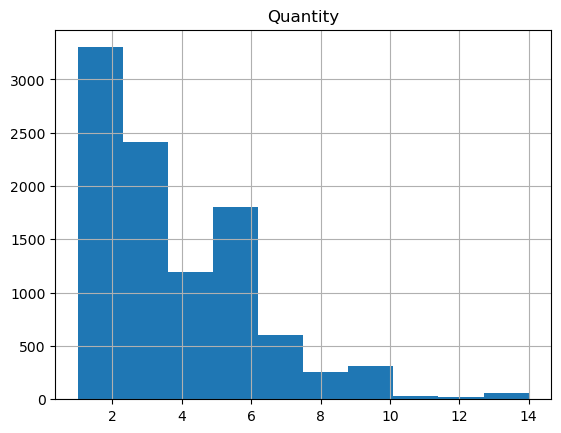

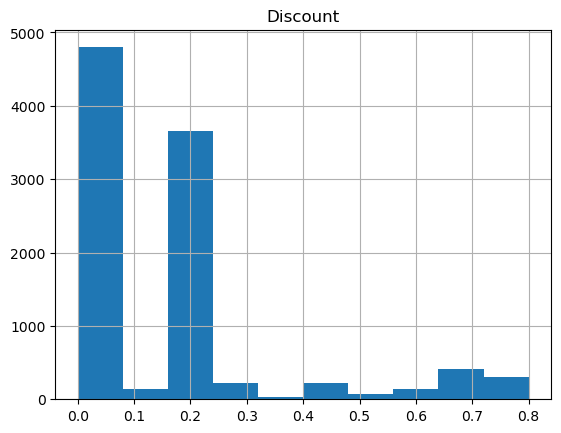

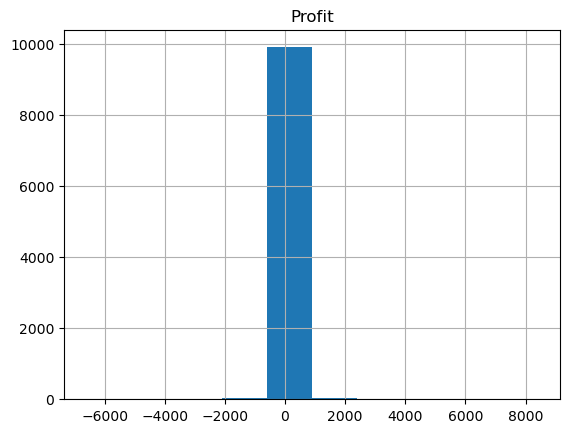

In [13]:

numeric_cols = dataset.select_dtypes(include=[np.number])

# plot histogram for each numeric column
for col in numeric_cols.columns:
    plt.figure()
    dataset[col].hist()
    plt.title(col)

plt.show()

# Scatter to check the Distribution of the Dataset

In [ ]:
# Plot scatter plots for all pairs of features
sns.set(style="ticks")
sns.pairplot(dataset)
plt.show()


# Boxplot to view present of Outliers

In [ ]:

# Plot box plots for all features
plt.figure(figsize=(10, 8))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

# Transforming Categorical features to numerical features

In [ ]:
# One-hot encoding for Ship Mode
ship_mode_encoded = pd.get_dummies(dataset['Ship Mode'], prefix='ShipMode')

# One-hot encoding for Segment
segment_encoded = pd.get_dummies(dataset['Segment'], prefix='Segment')

# Encoding for Country
dataset['CountryEncoded'] = (dataset['Country'] == 'United States').astype(int)

# Encoding for City using LabelEncoder
city_encoder = LabelEncoder()
dataset['CityEncoded'] = city_encoder.fit_transform(dataset['City'])

# Encoding for State using LabelEncoder
state_encoder = LabelEncoder()
dataset['StateEncoded'] = state_encoder.fit_transform(dataset['State'])

# Encoding for Product id using LabelEncoder
productId_encoder = LabelEncoder()
dataset['Product ID'] = state_encoder.fit_transform(dataset['Product ID'])

# Encoding for Category using LabelEncoder
category_encoder = LabelEncoder()
dataset['Category'] = state_encoder.fit_transform(dataset['Category'])

# Encoding for sub category using LabelEncoder
sub_category_encoder = LabelEncoder()
dataset['Sub-Category'] = state_encoder.fit_transform(dataset['Sub-Category'])


# Encoding for Region using LabelEncoder
category_encoder = LabelEncoder()
dataset['Region'] = state_encoder.fit_transform(dataset['Region'])

columns_to_drop = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region','Product ID','Category','Sub-Category']
# Drop the columns
dataset = dataset.drop(columns_to_drop, axis=1)

dataset.head()
# # Print the encoded dataset
# print(dataset[['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region']])
# print(ship_mode_encoded)
# print(segment_encoded)
# print(dataset[['CountryEncoded', 'CityEncoded', 'StateEncoded']])
# print(region_encoded)

## Outlier treatment

In [ ]:
# # Apply winsorization on the numerical features
# features = dataset.columns
# for feature in features:
#     # Compute the 5th and 95th percentiles of the feature
#     percentile_5 = np.percentile(dataset[feature], 5)
#     percentile_95 = np.percentile(dataset[feature], 95)

#     # Winsorize the feature by replacing extreme values with the corresponding percentile value
#     dataset[feature] = np.where(dataset[feature] > percentile_95, percentile_95, dataset[feature])
#     dataset[feature] = np.where(dataset[feature] < percentile_5, percentile_5, dataset[feature])
# dataset.head()

In [ ]:
# Plot box plots for all features
plt.figure(figsize=(10, 8))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.show()

## Normalization

In [ ]:
def plot_range_histogram(dataset):
    # Calculate the ranges of each variable
    range = dataset.max() - dataset.min()
    plt.hist(range, bins=20)
    plt.title("Range Histogram")
    plt.xlabel("Range")
    plt.ylabel("Frequency")
    plt.show()
plot_range_histogram(dataset)

In [ ]:

def plot_min_max(dataset):
    maxima = dataset.max().values
    minima = dataset.min().values
    # Plot the maxima and minima vectors against each other
    plt.scatter(minima, maxima)
    plt.plot(minima, maxima, color="red")
    plt.title("Plot of Maximum against Minimum")
    plt.xlabel("Minima")
    plt.ylabel("Maxima")
    plt.show()
    
plot_min_max(dataset)


In [ ]:
# Get the index of the feature to move
column_index = dataset.columns.get_loc("Profit")

# Move the feature to the last column
columns = list(dataset.columns)
columns.append(columns.pop(column_index))
dataset = dataset[columns]
dataset.head()

In [ ]:
# Select all rows and all columns except the last one from the liver_disease_data DataFrame
# This creates a DataFrame of independent variables
X = dataset.iloc[:,:-1].values

# Select all rows and only the last column from the liver_disease_data DataFrame
# This creates a Series of the dependent variable
y = dataset.iloc[:,-1].values
y

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the training set
scaler.fit(X_train)

# Transform the training and test sets using the fitted StandardScaler
X_train = scaler.transform(X_test)

# Modelling

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Decision Trees
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Gradient Boosting
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

# Support Vector Regression
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
svm_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

# Print the performance metrics
print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print("\nDecision Trees:")
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)
print("\nRandom Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("\nGradient Boosting:")
print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)
print("\nSupport Vector Regression:")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)

# Hyperparameter tuning

In [ ]:


# # Decision Trees
# tree_reg = DecisionTreeRegressor()
# tree_params = {
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# tree_grid = GridSearchCV(tree_reg, tree_params, scoring='neg_mean_squared_error', cv=5)
# tree_grid.fit(X_train, y_train)
# tree_best = tree_grid.best_estimator_
# tree_pred = tree_best.predict(X_test)
# tree_mse = mean_squared_error(y_test, tree_pred)
# tree_r2 = r2_score(y_test, tree_pred)

# # Random Forest
# rf_reg = RandomForestRegressor()
# rf_params = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_squared_error', cv=5)
# rf_grid.fit(X_train, y_train)
# rf_best = rf_grid.best_estimator_
# rf_pred = rf_best.predict(X_test)
# rf_mse = mean_squared_error(y_test, rf_pred)
# rf_r2 = r2_score(y_test, rf_pred)

# # Gradient Boosting
# gb_reg = GradientBoostingRegressor()
# gb_params = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 5, 10]
# }
# gb_grid = GridSearchCV(gb_reg, gb_params, scoring='neg_mean_squared_error', cv=5)
# gb_grid.fit(X_train, y_train)
# gb_best = gb_grid.best_estimator_
# gb_pred = gb_best.predict(X_test)
# gb_mse = mean_squared_error(y_test, gb_pred)
# gb_r2 = r2_score(y_test, gb_pred)

# # Support Vector Regression
# svm_reg = SVR()
# svm_params = {
#     'kernel': ['linear', 'rbf'],
#     'C': [0.1, 1.0, 10.0],
#     'epsilon': [0.1, 0.01, 0.001]
# }
# svm_grid = GridSearchCV(svm_reg, svm_params, scoring='neg_mean_squared_error', cv=5)
# svm_grid.fit(X_train, y_train)
# svm_best = svm_grid.best_estimator_
# svm_pred = svm_best.predict(X_test)
# svm_mse = mean_squared_error(y_test, svm_pred)
# svm_r2 = r2_score(y_test, svm_pred)
